# 문제
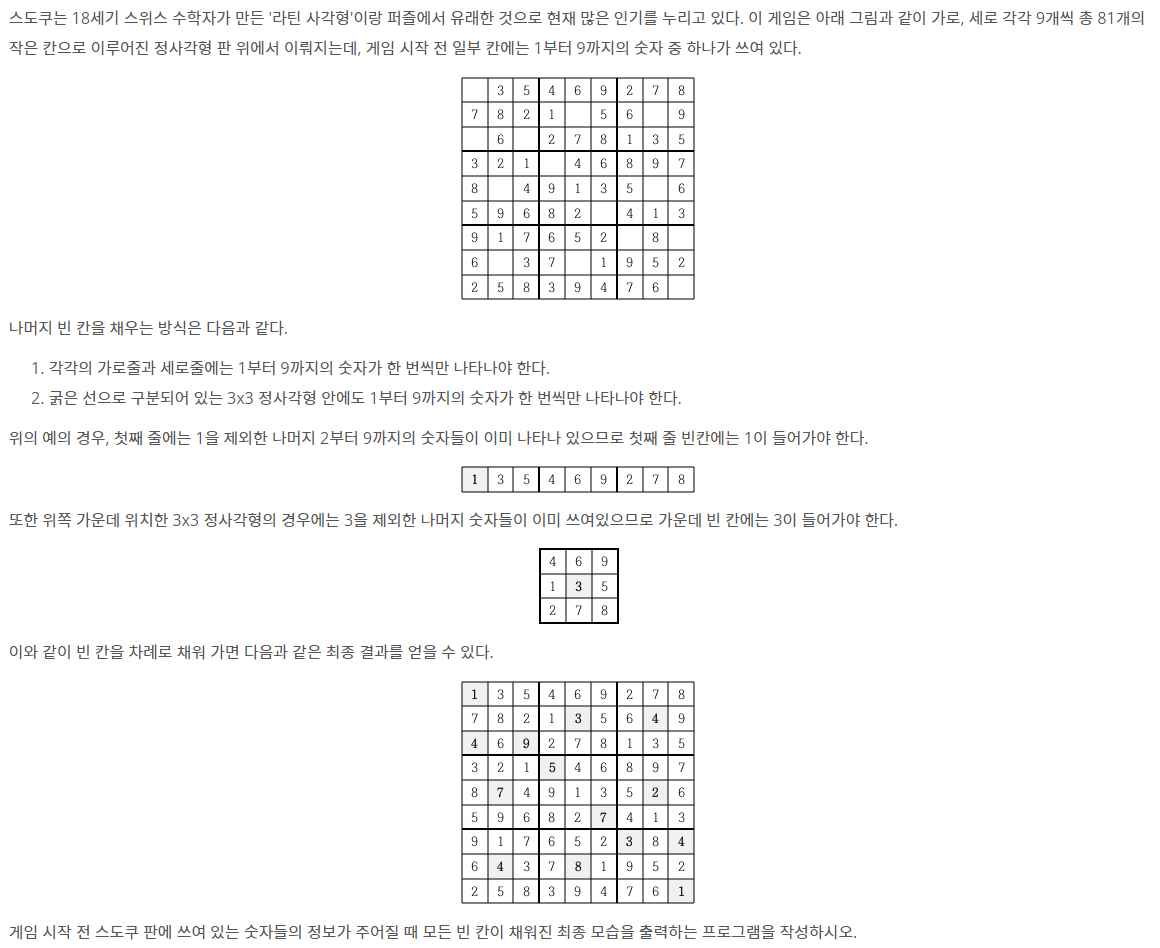

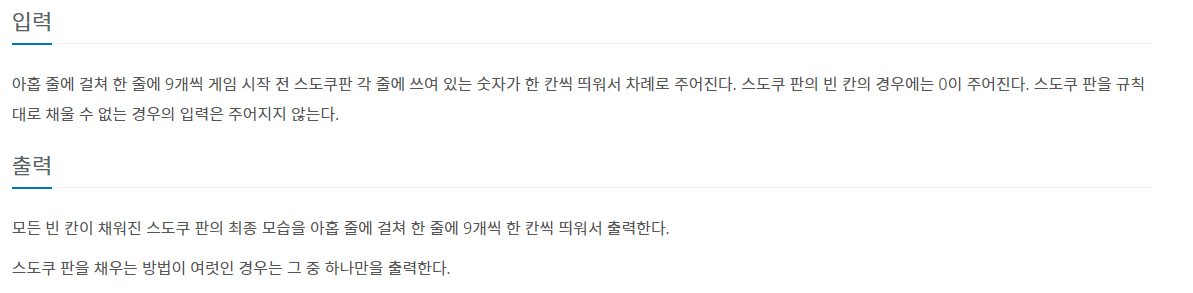

# 예제
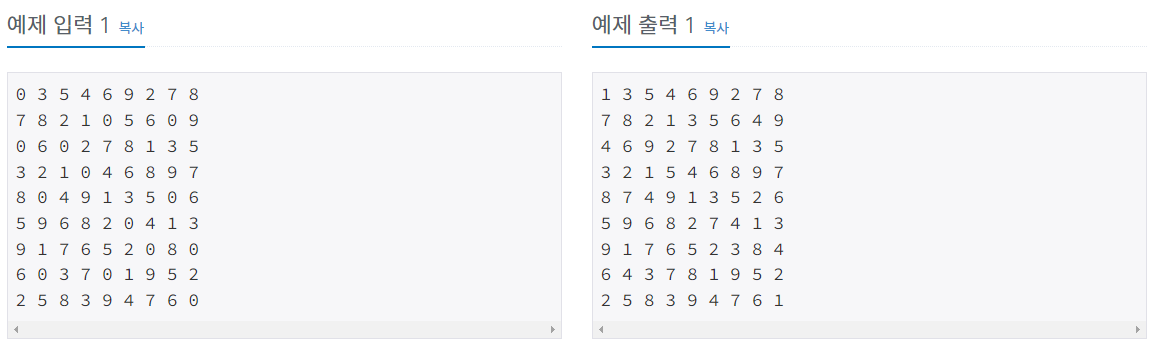

# 풀이
* 주어진 칸에 0이 감지되면, 가로줄 확인, 세로줄, 3x3 정사각형 확인 순서로 진행


In [3]:
sdoku = [(list(map(int, input().split()))) for _ in range(9)]

0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8
0 3 5 4 6 9 2 7 8


In [18]:
answer = [i for i in range(1, 10)]
def row(answer, sdoku, i, j):
  a_sub_b = [x for x in answer if x not in sdoku[i]]
  return a_sub_b

def column(answer, sdoku, i, j):
  b = [k[j] for k in sdoku]
  a_sub_b = [x for x in answer if x not in b]
  return a_sub_b

def box(answer, sdoku, i, j):
  start_row = i // 3 * 3
  start_col = j // 3 * 3
  current_box = [sdoku[start_row + r][start_col + c]for r in range(3) for c in range(3)] # 3x3 박스 설정
  return [x for x in answer if x not in current_box]

def solve_sdoku(sdoku):
  empty_spots = [(i, j) for i in range(9) for j in range(9) if sdoku[i][j] == 0] # 0인 지점 찾기
  def backtracking(index):
      if index == len(empty_spots): # 퍼즐이 다풀었을 때 판별
        return True
      i, j = empty_spots[index]
      possible_values = set(row(answer, sdoku, i, j)) & set(column(answer, sdoku, i, j)) & set(box(answer, sdoku, i, j)) # 교집합을 이용해서 가능한 값을 추출!
      for num in possible_values: # 빈칸을 풀 수 있으면 값을 넣고 아니면 0으로 나둠.
        sdoku[i][j] = num
        if backtracking(index + 1):
          return True
      sdoku[i][j] = 0
      return False
  backtracking(0) # 0인 개수가 없는게 다 푼것!
  return sdoku
sdoku = [list(map(int, input().split())) for _ in range(9)]
solved_sdoku = solve_sdoku(sdoku)

for row in solved_sdoku:
    print(" ".join(map(str, row)))

0 3 5 4 6 9 2 7 8
7 8 2 1 0 5 6 0 9
0 6 0 2 7 8 1 3 5
3 2 1 0 4 6 8 9 7
8 0 4 9 1 3 5 0 6
5 9 6 8 2 0 4 1 3
9 1 7 6 5 2 0 8 0
6 0 3 7 0 1 9 5 2
2 5 8 3 9 4 7 6 0
1 3 5 4 6 9 2 7 8
7 8 2 1 3 5 6 4 9
4 6 9 2 7 8 1 3 5
3 2 1 5 4 6 8 9 7
8 7 4 9 1 3 5 2 6
5 9 6 8 2 7 4 1 3
9 1 7 6 5 2 3 8 4
6 4 3 7 8 1 9 5 2
2 5 8 3 9 4 7 6 1
